# Necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import Data

In [2]:
data = pd.read_csv("./movies.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# PreProcessing

In [5]:
df.shape

(4803, 24)

In [6]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

# Visualization

In [8]:
# 1

In [9]:
genre_popularity = df.groupby('genres')['popularity'].mean()

In [10]:
top_genres = genre_popularity.sort_values(ascending=False).head(20)

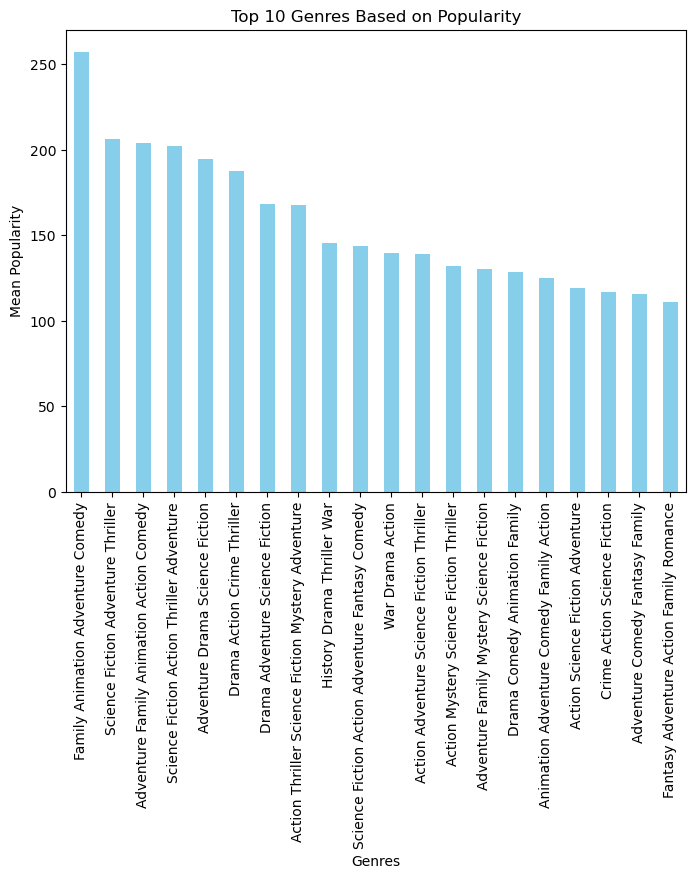

In [11]:
plt.figure(figsize=(8,6))
top_genres.plot(kind='bar',color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 10 Genres Based on Popularity')
plt.xlabel('Genres')
plt.ylabel('Mean Popularity')
plt.show()

# Feature Engineering

In [12]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [13]:
selected_features = ['genres','keywords','tagline','cast','director']

In [14]:
# replace null values with null string
for i in selected_features:
    df[i] = df[i].fillna('')

In [15]:
# concatenate the text from the selected features into a single text feature
combined_features = df['combined_features'] = df['genres'] + ' ' + df['keywords'] + ' ' + df['tagline'] + ' ' + df['cast'] + ' ' + df['director']

In [16]:
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [17]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [18]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [19]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.11280357148547558
  (0, 13024)	0.19423620601088706
  (0, 10229)	0.160586854000953
  (0, 8756)	0.22709015857011813
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.1984326396510037
  (0, 14064)	0.2059609041508414
  (0, 13319)	0.21774705394124838
  (0, 17290)	0.20197912553916564
  (0, 17007)	0.23643326319898794
  (0, 13349)	0.15021264094167083
  (0, 11503)	0.2721131005698365
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.12821263228505786
  (0, 15261)	0.07095833561276564
  (0, 4945)	0.24025852494110755
  (0, 14271)	0.21392179219912874
  (0, 3225)	0.24960162956997733
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.3396275221095982
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661422
  (0, 3678)	0.21392179219912874
  (0, 5437)	0.10364139873166359
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672)

# Cosine Similarity

In [20]:
similarity = cosine_similarity(feature_vectors)

In [21]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [22]:
print(similarity.shape)

(4803, 4803)


In [23]:
# get movie name from user
movie_name = input(' Enter your favorite movie name : ')

 Enter your favorite movie name : intestlar


In [24]:
# list of all movie names
list_of_all_titles = df['title'].tolist()

In [25]:
# Finding the close match for the movie name given by the user input

find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match)

['Interstellar', 'Firestarter']


In [26]:
close_match = find_close_match[0]
print(close_match)

Interstellar


In [27]:
df.title

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [28]:
# lets find close_match index
index_of_movie = df[df.title == close_match]['index'].values[0]

In [29]:
index_of_movie

95

In [30]:
df[df['index'] == 95]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
95,95,165000000,Adventure Drama Science Fiction,http://www.interstellarmovie.net/,157336,saving the world artificial intelligence fathe...,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Matthew McConaughey Jessica Chastain Anne Hath...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Adventure Drama Science Fiction saving the wor...


In [32]:
# getting list of similarity movies
similarity_score = list(enumerate(similarity[index_of_movie]))
print(similarity_score)

[(0, 0.04690381740822483), (1, 0.03831402197003224), (2, 0.018098724847008234), (3, 0.2063965588105755), (4, 0.051122386410183206), (5, 0.012527150972255683), (6, 0.01625818642247377), (7, 0.03776108705191674), (8, 0.01790068201051717), (9, 0.05000601231520931), (10, 0.0886320678587222), (11, 0.006636552850054032), (12, 0.007627939316714518), (13, 0.028694978881570445), (14, 0.09823526879515906), (15, 0.02980193032467172), (16, 0.03580553739745697), (17, 0.038983840421059256), (18, 0.03267873440522361), (19, 0.06766907844258897), (20, 0.032600294524423305), (21, 0.006269727149046218), (22, 0.010921731648286144), (23, 0.014453447316669449), (24, 0.03275262870446351), (25, 0.044089343554847456), (26, 0.028327077952931563), (27, 0.05690903506968482), (28, 0.03181738382945613), (29, 0.01850810038730799), (30, 0.007529314973734752), (31, 0.045849808865819436), (32, 0.08210532595586009), (33, 0.037526466097646816), (34, 0.019305361415044055), (35, 0.03901594422557502), (36, 0.046432574988942

In [33]:
# we need high score of similarity

In [35]:
# sorting the movies based on their similarity score:

sorted_similarity_movies = sorted(similarity_score,key = lambda x:x[1], reverse = True)

print(sorted_similarity_movies)

[(95, 1.0), (3, 0.2063965588105755), (634, 0.18305727680325748), (270, 0.17926326535776163), (3688, 0.1741602732831354), (1102, 0.16409444892599875), (123, 0.15830477814282753), (125, 0.15584658890247313), (3439, 0.1554209321593181), (149, 0.1515115120237407), (108, 0.14978336276354937), (365, 0.14645132725077775), (43, 0.14507272604502497), (2793, 0.1449581905001056), (3645, 0.1445129885195795), (1446, 0.1420702018153898), (437, 0.13926153929853893), (2285, 0.13799780907978462), (93, 0.13725112503164702), (1196, 0.130939373798823), (119, 0.12878733973574516), (2366, 0.127316118581108), (2817, 0.1266930290692066), (471, 0.12587742190082593), (1296, 0.12477145465776533), (3373, 0.12439808347631731), (3413, 0.12350233681003053), (2677, 0.12269340218073395), (1611, 0.1223509481376469), (886, 0.12193675629878876), (2212, 0.12080086034046027), (4608, 0.12074938017414967), (1645, 0.12019513801384647), (65, 0.12007985540794443), (2790, 0.11981682803258173), (1018, 0.11878251943581178), (3668,

In [44]:
### print the name of similar movies based on the index:

print('These 10 movies are very close to your taste! You can watch them : \n')

i = 1

for movie in sorted_similarity_movies:
    
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<=10):
        print(i, '.',title_from_index)
        i+=1

These 10 movies are very close to your taste! You can watch them : 

1 . Interstellar
2 . The Dark Knight Rises
3 . The Matrix
4 . The Martian
5 . Dear Frankie
6 . Argo
7 . The Matrix Revolutions
8 . The Matrix Reloaded
9 . The Terminator
10 . Armageddon


In [45]:
# let's go for deploy 

In [46]:
import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Save the similarity matrix
with open('similarity_matrix.pkl', 'wb') as similarity_file:
    pickle.dump(similarity, similarity_file)